# 43A-modeling-regression

> Building a regression model that uses iPhone 13 data to predict iPhone 14 March 2023 claims. The difference in this notebook is that we are utilizing more features to be more consistent with random forest's feature set.

The WMAPE of the linear regression model that is using iPhone 13 data with iPhone 13 testing data is 66.62
The WMAPE of the linear regression model that is using iPhone 13 data with iPhone 14 testing data is 283.35

The final prediction values of iPhone 14 claims are:
- 3/6/23: 24 iPhone 14 claims
- 3/13/23: 62 iPhone 14 claims
- 3/20/23: 324 iPhone 14 claims
- 3/27/23: 362 iPhone 14 claims

In [187]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import datetime as dt

from datetime import datetime

from sklearn.linear_model import LinearRegression

import os

import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn import preprocessing

In [188]:
#Constants/globals
os.chdir('/data/p_dsi/teams2023/team9/')
os.getcwd()

In [189]:
#load the data
data = pd.read_csv("Asurion_clean_data_feature_set.csv")
display(data.info())
data.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11684 entries, 0 to 11683
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   phone model       11684 non-null  object
 1   phone size        11684 non-null  object
 2   phone color       11684 non-null  object
 3   claim             11684 non-null  int64 
 4   weeks_monday      11684 non-null  object
 5   month             11684 non-null  object
 6   year              11684 non-null  int64 
 7   season            11684 non-null  object
 8   quarter           11684 non-null  object
 9   Holidays_Boolean  11684 non-null  bool  
 10  company           11684 non-null  object
 11  model_group       11684 non-null  object
dtypes: bool(1), int64(2), object(9)
memory usage: 1015.6+ KB


None

,phone model,phone size,phone color,claim,weeks_monday,month,year,season,quarter,Holidays_Boolean,company,model_group
0,apple iphone 11,128gb,black,252,2022-01-24,January,2022,winter,Q1,False,apple,iphone 11
1,apple iphone 11,128gb,green,45,2022-01-24,January,2022,winter,Q1,False,apple,iphone 11
2,apple iphone 11,128gb,purple,92,2022-01-24,January,2022,winter,Q1,False,apple,iphone 11
3,apple iphone 11,128gb,red,69,2022-01-24,January,2022,winter,Q1,False,apple,iphone 11
4,apple iphone 11,128gb,white,91,2022-01-24,January,2022,winter,Q1,False,apple,iphone 11
5,apple iphone 11,128gb,yellow,5,2022-01-24,January,2022,winter,Q1,False,apple,iphone 11
6,apple iphone 11,256gb,black,24,2022-01-24,January,2022,winter,Q1,False,apple,iphone 11
7,apple iphone 11,256gb,green,3,2022-01-24,January,2022,winter,Q1,False,apple,iphone 11
8,apple iphone 11,256gb,purple,7,2022-01-24,January,2022,winter,Q1,False,apple,iphone 11
9,apple iphone 11,256gb,red,9,2022-01-24,January,2022,winter,Q1,False,apple,iphone 11


In [190]:
data_copy = data.copy()

data_copy['weeks_monday'] = pd.to_datetime(data_copy['weeks_monday'].str.strip(), format='%Y-%m-%d')
data_copy['Holidays_Boolean'] = np.where(data_copy['Holidays_Boolean'] == True, 'Holidays_True', 'Holidays_False')

display(data_copy)

,phone model,phone size,phone color,claim,weeks_monday,month,year,season,quarter,Holidays_Boolean,company,model_group
0,apple iphone 11,128gb,black,252,2022-01-24,January,2022,winter,Q1,Holidays_False,apple,iphone 11
1,apple iphone 11,128gb,green,45,2022-01-24,January,2022,winter,Q1,Holidays_False,apple,iphone 11
2,apple iphone 11,128gb,purple,92,2022-01-24,January,2022,winter,Q1,Holidays_False,apple,iphone 11
3,apple iphone 11,128gb,red,69,2022-01-24,January,2022,winter,Q1,Holidays_False,apple,iphone 11
4,apple iphone 11,128gb,white,91,2022-01-24,January,2022,winter,Q1,Holidays_False,apple,iphone 11
...,...,...,...,...,...,...,...,...,...,...,...,...
11679,apple iphone xs max,256gb,silver,4,2023-02-13,February,2023,winter,Q1,Holidays_False,apple,iphone x
11680,apple iphone xs max,512gb,gray,2,2023-02-13,February,2023,winter,Q1,Holidays_False,apple,iphone x
11681,apple iphone xs max,64gb,gold,12,2023-02-13,February,2023,winter,Q1,Holidays_False,apple,iphone x
11682,apple iphone xs max,64gb,gray,8,2023-02-13,February,2023,winter,Q1,Holidays_False,apple,iphone x


In [191]:
iphone13 = data_copy[data_copy["model_group"] == "iphone 13"]
iphone14 = data_copy[data_copy["model_group"] == "iphone 14"]

iphone13 = iphone13.assign(since_release = lambda x: (x.weeks_monday - datetime.strptime("2021-09-24", '%Y-%m-%d')))
iphone14 = iphone14.assign(since_release = lambda x: (x.weeks_monday - datetime.strptime("2022-09-16", '%Y-%m-%d')))
iphone13["since_release"] = iphone13["since_release"].astype(str)
iphone13["since_release"] = iphone13["since_release"].str.split().str[0].astype(int)
iphone14["since_release"] = iphone14["since_release"].astype(str)
iphone14["since_release"] = iphone14["since_release"].str.split().str[0].astype(int)

In [192]:
display(iphone13["phone color"].unique())

display(iphone14["phone color"].unique())

# iPhone 13 midnight is the same version as black
# iPhone 13 starlight is the same version as white

iphone13['phone color'][iphone13['phone color'] == 'midnight'] = 'black'

iphone13['phone color'][iphone13['phone color'] == 'starlight'] = 'white'

# iPhone 13 has graphite, green and pink colors which are not in iPhone 14 - so categorizing them as "other"
iphone13['phone color'][iphone13['phone color'] == 'graphite'] = 'other'
iphone13['phone color'][iphone13['phone color'] == 'green'] = 'other'
iphone13['phone color'][iphone13['phone color'] == 'pink'] = 'other'

# iPhone 14 has purple, which is not in iPhone 13 - so categorizing it as "other"
iphone14['phone color'][iphone14['phone color'] == 'purple'] = 'other'

display(iphone13["phone color"].unique())

display(iphone14["phone color"].unique())

array(['midnight', 'blue', 'green', 'pink', 'red', 'starlight', 'gold',
       'graphite', 'silver'], dtype=object)

array(['black', 'white', 'blue', 'purple', 'red', 'gold', 'silver'],
      dtype=object)

C:\Users\tiffa.TIFFANY\AppData\Local\Temp\ipykernel_10900\2901576365.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iphone13['phone color'][iphone13['phone color'] == 'midnight'] = 'black'
C:\Users\tiffa.TIFFANY\AppData\Local\Temp\ipykernel_10900\2901576365.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iphone13['phone color'][iphone13['phone color'] == 'starlight'] = 'white'
C:\Users\tiffa.TIFFANY\AppData\Local\Temp\ipykernel_10900\2901576365.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pand

array(['black', 'blue', 'other', 'red', 'white', 'gold', 'silver'],
      dtype=object)

array(['black', 'white', 'blue', 'other', 'red', 'gold', 'silver'],
      dtype=object)

In [211]:
iphone13_copy = iphone13.copy()
iphone14_copy = iphone14.copy()

# dropping a few columns
iphone13_copy = iphone13_copy.drop('phone model', axis = 1)
iphone13_copy = iphone13_copy.drop('company', axis = 1)
iphone13_copy = iphone13_copy.drop('weeks_monday', axis = 1)
iphone13_copy = iphone13_copy.drop('month', axis = 1)
iphone13_copy = iphone13_copy.drop('year', axis = 1)
iphone13_copy = iphone13_copy.drop('model_group', axis = 1)

# Remove 'gb' in phone size
iphone13_copy['phone size'] = iphone13_copy['phone size'].str[:-2].astype(int)


#one-hot encoder for categorical variables
one_hot_encoded = pd.get_dummies(iphone13_copy['phone color'])
iphone13_copy = iphone13_copy.join(one_hot_encoded)
iphone13_copy = iphone13_copy.drop('phone color', axis = 1)

one_hot_encoded = pd.get_dummies(iphone13_copy['season'])
iphone13_copy = iphone13_copy.join(one_hot_encoded)
iphone13_copy = iphone13_copy.drop('season', axis = 1)

one_hot_encoded = pd.get_dummies(iphone13_copy['quarter'])
iphone13_copy = iphone13_copy.join(one_hot_encoded)
iphone13_copy = iphone13_copy.drop('quarter', axis = 1)

one_hot_encoded = pd.get_dummies(iphone13_copy['Holidays_Boolean'])
iphone13_copy = iphone13_copy.join(one_hot_encoded)
iphone13_copy = iphone13_copy.drop('Holidays_Boolean', axis = 1)


# dropping a few columns
iphone14_copy = iphone14_copy.drop('phone model', axis = 1)
iphone14_copy = iphone14_copy.drop('company', axis = 1)
iphone14_copy = iphone14_copy.drop('weeks_monday', axis = 1)
iphone14_copy = iphone14_copy.drop('month', axis = 1)
iphone14_copy = iphone14_copy.drop('year', axis = 1)
iphone14_copy = iphone14_copy.drop('model_group', axis = 1)

# Remove 'gb' in phone size
iphone14_copy['phone size'] = iphone14_copy['phone size'].str[:-2].astype(int)


#one-hot encoder for categorical variables
one_hot_encoded = pd.get_dummies(iphone14_copy['phone color'])
iphone14_copy = iphone14_copy.join(one_hot_encoded)
iphone14_copy = iphone14_copy.drop('phone color', axis = 1)

one_hot_encoded = pd.get_dummies(iphone14_copy['season'])
iphone14_copy = iphone14_copy.join(one_hot_encoded)
iphone14_copy = iphone14_copy.drop('season', axis = 1)

one_hot_encoded = pd.get_dummies(iphone14_copy['quarter'])
iphone14_copy = iphone14_copy.join(one_hot_encoded)
iphone14_copy = iphone14_copy.drop('quarter', axis = 1)

one_hot_encoded = pd.get_dummies(iphone14_copy['Holidays_Boolean'])
iphone14_copy = iphone14_copy.join(one_hot_encoded)
iphone14_copy = iphone14_copy.drop('Holidays_Boolean', axis = 1)


display(iphone13_copy)
display(iphone14_copy)

,phone size,claim,since_release,black,blue,gold,other,red,silver,white,autumn,spring,summer,winter,Q1,Q2,Q3,Q4,Holidays_False,Holidays_True
63,128,11,122,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0
189,128,144,416,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0
190,128,13,416,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,1,0
191,128,74,416,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0
192,128,128,416,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11646,256,60,507,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,1,0
11647,256,12,507,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,1,0
11648,256,16,507,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,1,0
11649,512,15,507,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0


,phone size,claim,since_release,black,blue,gold,other,red,silver,white,autumn,winter,Q1,Q4,Holidays_False,Holidays_True
228,128,7,59,1,0,0,0,0,0,0,1,0,0,1,1,0
229,128,2,59,0,0,0,0,0,0,1,1,0,0,1,1,0
393,128,11,66,1,0,0,0,0,0,0,1,0,0,1,0,1
394,128,8,66,0,0,0,0,0,0,1,1,0,0,1,0,1
395,256,8,66,1,0,0,0,0,0,0,1,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11651,128,6,150,1,0,0,0,0,0,0,0,1,1,0,1,0
11652,128,4,150,0,0,0,0,0,0,1,0,1,1,0,1,0
11653,128,12,150,1,0,0,0,0,0,0,0,1,1,0,1,0
11654,128,18,150,0,0,1,0,0,0,0,0,1,1,0,1,0


In [212]:
iphone14_copy = iphone14_copy.assign(spring = 0)
iphone14_copy = iphone14_copy.assign(summer = 0)
iphone14_copy = iphone14_copy.assign(Q2 = 0)
iphone14_copy = iphone14_copy.assign(Q3 = 0)

# Has to be ordered properly to remove warning
iphone14_copy = iphone14_copy.iloc[:,[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 16, 17, 11, 12, 18, 19, 13, 14, 15]]

display(iphone14_copy)

,phone size,claim,since_release,black,blue,gold,other,red,silver,white,autumn,spring,summer,winter,Q1,Q2,Q3,Q4,Holidays_False,Holidays_True
228,128,7,59,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0
229,128,2,59,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,1,0
393,128,11,66,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1
394,128,8,66,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,1
395,256,8,66,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11651,128,6,150,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0
11652,128,4,150,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,1,0
11653,128,12,150,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0
11654,128,18,150,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,1,0


In [213]:
# Remove the last since_release date due to outlier error and to be consistent with other models

# These are the max since_release dates
display(iphone13_copy['since_release'].max())

display(iphone14_copy['since_release'].max())

# We need to remove the max since_release dates for consistency
iphone13_copy.drop(iphone13_copy.loc[iphone13_copy['since_release']==507].index, inplace=True)

display(iphone13_copy['since_release'].max())

iphone14_copy.drop(iphone14_copy.loc[iphone14_copy['since_release']==150].index, inplace=True)

display(iphone14_copy['since_release'].max())

507

150

500

143

# iPhone 13

In [214]:
final_13 = iphone13_copy.copy()

# Create feature variable
x = final_13.drop('claim', axis = 1)
y = final_13['claim']

display(x)
display(y)

# Creating train and test sets
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=101)

,phone size,since_release,black,blue,gold,other,red,silver,white,autumn,spring,summer,winter,Q1,Q2,Q3,Q4,Holidays_False,Holidays_True
63,128,122,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0
189,128,416,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0
190,128,416,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,1,0
191,128,416,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0
192,128,416,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11490,256,500,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,1,0
11491,256,500,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,1,0
11492,256,500,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,1,0
11493,512,500,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0


63        11
189      144
190       13
191       74
192      128
        ... 
11490    335
11491     81
11492     73
11493     77
11494     14
Name: claim, Length: 1624, dtype: int64

In [215]:
# Putting together the original X_train & y_train X_test and y_test datasets together

X_train_copy = X_train.copy()
y_train_copy = y_train.copy()

iphone_13_train = pd.merge(X_train_copy, y_train_copy, left_index = True, right_index = True)

iphone_13_train = iphone_13_train.groupby(['since_release'], as_index = False).agg({'claim': np.sum})

# This is the resulting iPhone 13 Train set put together
display(iphone_13_train)

X_test_copy = X_test.copy()
y_test_copy = y_test.copy()

iphone_13_test = pd.merge(X_test_copy, y_test_copy, left_index = True, right_index = True)

iphone_13_test = iphone_13_test.groupby(['since_release'], as_index = False).agg({'claim': np.sum})

# This is the resulting iPhone 13 test set put together
display(iphone_13_test)

,since_release,claim
0,66,6
1,80,10
2,87,5
3,101,3
4,115,10
5,129,25
6,136,4
7,143,93
8,150,93
9,157,138


,since_release,claim
0,52,2
1,59,3
2,73,2
3,87,1
4,94,15
5,101,4
6,108,13
7,122,11
8,136,72
9,143,7


In [216]:
model = LinearRegression()

model.fit(X_train,y_train)

model.predict(X_train)

values = model.predict(X_train)

values_df = pd.DataFrame({'claim':values})

display(values_df)

,claim
0,20.845199
1,28.613875
2,126.240371
3,49.786864
4,42.045010
...,...
1131,93.820889
1132,120.682008
1133,60.721853
1134,106.877627


In [217]:
X_train_copy = X_train.copy()

X_train_copy.reset_index(inplace = True)

X_train_copy = X_train_copy.drop('index', axis = 1)

training_model_iphone13 = pd.merge(X_train_copy, values_df, left_index = True, right_index = True)

training_model_iphone13 = training_model_iphone13.groupby(['since_release'], as_index = False).agg({'claim': np.sum})

display(training_model_iphone13)

,since_release,claim
0,66,47.976720
1,80,55.266713
2,87,3.272619
3,101,64.076263
4,115,11.908756
5,129,42.616867
6,136,8.804152
7,143,72.522103
8,150,92.115152
9,157,105.018732


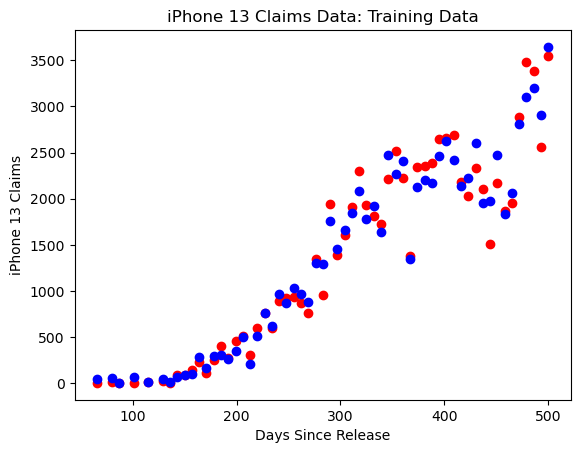

In [218]:
# Plotting the iPhone 13 training data to what the model predicted
plt.scatter(iphone_13_train['since_release'], iphone_13_train['claim'], color='red') # plotting the observation line
 
plt.scatter(training_model_iphone13['since_release'], training_model_iphone13['claim'], color='blue') # plotting the regression line
 
plt.title("iPhone 13 Claims Data: Training Data") # stating the title of the graph
 
plt.xlabel("Days Since Release") # adding the name of x-axis
plt.ylabel("iPhone 13 Claims") # adding the name of y-axis
plt.show()

In [219]:
y_pred = model.predict(X_test)

y_pred_df = pd.DataFrame({'claim':y_pred})

display(y_pred_df)

,claim
0,150.210031
1,107.998504
2,98.748974
3,65.795086
4,86.530896
...,...
483,41.189283
484,151.727846
485,86.017109
486,68.011845


In [220]:
X_test_copy = X_test.copy()

X_test_copy.reset_index(inplace = True)

X_test_copy = X_test_copy.drop('index', axis = 1)

testing_model_iphone13 = pd.merge(X_test_copy, values_df, left_index = True, right_index = True)

testing_model_iphone13 = testing_model_iphone13.groupby(['since_release'], as_index = False).agg({'claim': np.sum})

display(testing_model_iphone13)

,since_release,claim
0,52,65.952745
1,59,86.514012
2,73,-7.964390
3,87,139.076078
4,94,96.163922
5,101,73.155780
6,108,99.089419
7,122,98.795145
8,136,122.417880
9,143,52.152027


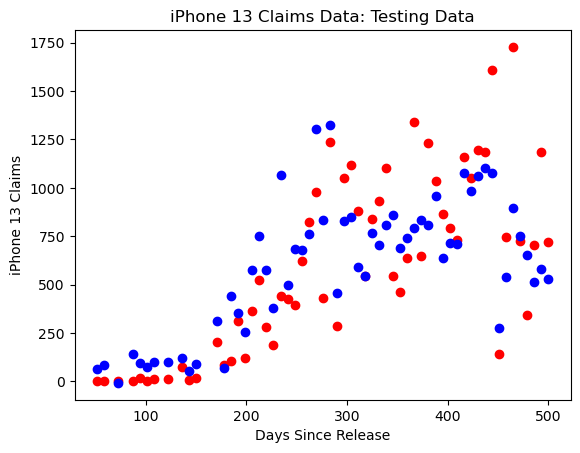

In [221]:
# Plotting the iPhone 13 test data

plt.scatter(iphone_13_test['since_release'], iphone_13_test['claim'], color='red') # plotting the observation line
 
plt.scatter(testing_model_iphone13['since_release'], testing_model_iphone13['claim'], color='blue') # plotting the regression line
 
plt.title("iPhone 13 Claims Data: Testing Data") # stating the title of the graph
 
plt.xlabel("Days Since Release") # adding the name of x-axis
plt.ylabel("iPhone 13 Claims") # adding the name of y-axis
plt.show()

In [222]:
# WMAPE Formula Function
def calc_wmape(actual, pred):
    abs_diff = abs(actual - pred)
    weight = (abs_diff / actual * 100) * actual
    total_weight = weight.sum()
    total_claims = actual.sum()
    return (total_weight/total_claims)

In [223]:
calc_wmape(y_test, y_pred)

# The WMAPE of the linear regression model that is using iPhone 13 data to iPhone 13 testing data is 66.24

66.6249860283975

# iPhone 14

#### Using the model that was trained on iPhone 13, we will now use iPhone 14 as the testing data

In [224]:
final_14 = iphone14_copy.copy()

# Create feature variable
X_test_14 = final_14.drop('claim', axis = 1)
y_test_14 = final_14['claim']

display(X_test_14)
display(y_test_14)

,phone size,since_release,black,blue,gold,other,red,silver,white,autumn,spring,summer,winter,Q1,Q2,Q3,Q4,Holidays_False,Holidays_True
228,128,59,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0
229,128,59,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,1,0
393,128,66,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1
394,128,66,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,1
395,256,66,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11500,512,143,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,1,0
11501,128,143,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0
11502,128,143,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,1,0
11503,128,143,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,1,0


228       7
229       2
393      11
394       8
395       8
         ..
11500     1
11501    71
11502    50
11503    68
11504     1
Name: claim, Length: 63, dtype: int64

In [225]:
y_pred_14 = model.predict(X_test_14)

display(y_pred_14)

y_pred_df_14 = pd.DataFrame({'claim':y_pred_14})

display(y_pred_df_14)

array([ -7.46340529, -43.07845157,  -2.19487539, -37.80992167,
       -20.43674198, -56.05178826,  -3.81840891, -39.43345519,
       -22.0602755 ,  -0.17341254, -35.78845882, -18.41527912,
       -54.0303254 ,  -1.99591073, -37.610957  , -20.23777731,
       -55.85282359,   1.64908565, -33.96596063, -16.59278093,
        42.66575367, -52.20782721,  -0.47809631, -36.09314259,
       -18.7199629 , -54.33500918, -55.20369607,  10.08625831,
       -25.52878797,  -8.15560827,  51.10292633,   3.8262749 ,
       -43.77065455,   8.46272479, -27.15232149,  -9.7791418 ,
        49.47939281, -38.12819987, -45.39418808,  13.73125469,
       -21.88379159,  -4.5106119 , -40.12565818, -40.99434507,
        12.10772117, -23.50732511,  -6.13414542, -41.7491917 ,
        13.93021935, -21.68482693,  -4.31164723,  54.94688737,
       -39.92669351,  15.75271754, -19.86232874,  -2.48914904,
       -38.10419532, -38.97288221, -74.58792849,  15.75271754,
        41.99102627,  27.73460072,  -0.72838034])

,claim
0,-7.463405
1,-43.078452
2,-2.194875
3,-37.809922
4,-20.436742
...,...
58,-74.587928
59,15.752718
60,41.991026
61,27.734601


In [226]:
X_test_14_copy = X_test_14.copy()

X_test_14_copy.reset_index(inplace = True)

X_test_14_copy = X_test_14_copy.drop('index', axis = 1)

testing_model_iphone14 = pd.merge(X_test_14_copy, y_pred_df_14, left_index = True, right_index = True)

testing_model_iphone14 = testing_model_iphone14.groupby(['since_release'], as_index = False).agg({'claim': np.sum})

# This contains the predicted test values
display(testing_model_iphone14)

,since_release,claim
0,59,-50.541857
1,66,-116.493327
2,73,-65.312140
3,80,-115.697469
4,87,-108.407476
5,94,-58.451729
6,101,-164.829907
7,108,-12.439591
8,115,-62.511734
9,122,-93.783152


In [227]:
# The actual true iPhone 14 values
final_14_sum = final_14.groupby(['since_release'], as_index = False).agg({'claim': np.sum})\

final_14_sum

,since_release,claim
0,59,9
1,66,30
2,73,23
3,80,43
4,87,32
5,94,36
6,101,44
7,108,45
8,115,59
9,122,60


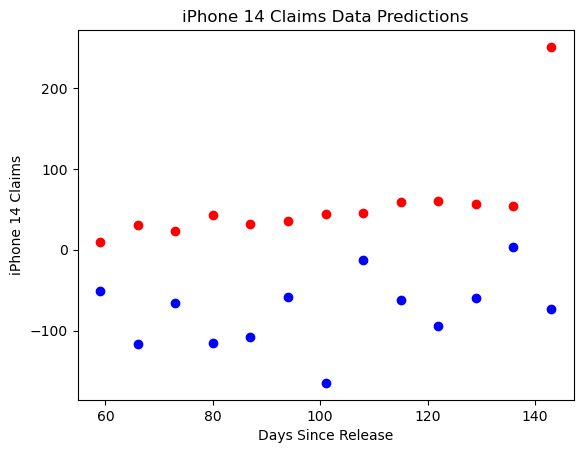

In [229]:
#Plotting how the iPhone 14 true values did to the predicted iPhone 14 values

plt.scatter(final_14_sum['since_release'], final_14_sum['claim'], color='red') # plotting the observation line
 
plt.scatter(testing_model_iphone14['since_release'], testing_model_iphone14['claim'], color='blue') # plotting the regression line
 
plt.title("iPhone 14 Claims Data Predictions") # stating the title of the graph
 
plt.xlabel("Days Since Release") # adding the name of x-axis
plt.ylabel("iPhone 14 Claims") # adding the name of y-axis
plt.show()

In [230]:
calc_wmape(y_test_14, y_pred_14)

# The WMAPE of the linear regression model that is using iPhone 13 data to iPhone 14 testing data is 283.35

283.3585001320155

# Calculating March 2023 Prediction Values

In [231]:
# 171 days is 3/6/2023, season: winter, holidays: no, within Q1  
# 178 days is 3/13/2023, season: winter, holidays: no, within Q1  
# 185 days is 3/20/2023, season: spring, holidays: no, within Q1      
# 192 days is 3/27/2023, season: spring, holidays: no, within Q1    

# 3/6 Prediction
black = model.predict([[128, 171, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0]])
blue = model.predict([[128, 171, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0]])
gold = model.predict([[128, 171, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0]])
other = model.predict([[128, 171, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0]])
red = model.predict([[128, 171, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0]])
silver = model.predict([[128, 171, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0]])
white = model.predict([[128, 171, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0]])

march_6_128 = black[0] + blue[0] + gold[0] + other[0] + red[0] + silver[0] + white[0]

black = model.predict([[256, 171, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0]])
blue = model.predict([[256, 171, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0]])
gold = model.predict([[256, 171, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0]])
other = model.predict([[256, 171, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0]])
red = model.predict([[256, 171, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0]])
silver = model.predict([[256, 171, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0]])
white = model.predict([[256, 171, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0]])

march_6_256 = black[0] + blue[0] + gold[0] + other[0] + red[0] + silver[0] + white[0]


black = model.predict([[512, 171, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0]])
blue = model.predict([[512, 171, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0]])
gold = model.predict([[512, 171, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0]])
other = model.predict([[512, 171, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0]])
red = model.predict([[512, 171, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0]])
silver = model.predict([[512, 171, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0]])
white = model.predict([[512, 171, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0]])

march_6_512 = black[0] + blue[0] + gold[0] + other[0] + red[0] + silver[0] + white[0]

march_6 = march_6_128 + march_6_256 + march_6_512

# The storage size as 512 is predicting the values too low
display(march_6)

# Final prediction value is 24

C:\Users\tiffa.TIFFANY\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\tiffa.TIFFANY\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\tiffa.TIFFANY\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\tiffa.TIFFANY\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\tiffa.TIFFANY\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\tiffa.TIFFANY\anaconda3\lib\site-packages

24.225224573809754

In [232]:
# 3/13 Prediction
black = model.predict([[128, 178, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0]])
blue = model.predict([[128, 178, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0]])
gold = model.predict([[128, 178, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0]])
other = model.predict([[128, 178, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0]])
red = model.predict([[128, 178, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0]])
silver = model.predict([[128, 178, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0]])
white = model.predict([[128, 178, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0]])

march_13_128 = black[0] + blue[0] + gold[0] + other[0] + red[0] + silver[0] + white[0]

black = model.predict([[256, 178, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0]])
blue = model.predict([[256, 178, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0]])
gold = model.predict([[256, 178, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0]])
other = model.predict([[256, 178, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0]])
red = model.predict([[256, 178, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0]])
silver = model.predict([[256, 178, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0]])
white = model.predict([[256, 178, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0]])

march_13_256 = black[0] + blue[0] + gold[0] + other[0] + red[0] + silver[0] + white[0]


black = model.predict([[512, 178, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0]])
blue = model.predict([[512, 178, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0]])
gold = model.predict([[512, 178, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0]])
other = model.predict([[512, 178, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0]])
red = model.predict([[512, 178, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0]])
silver = model.predict([[512, 178, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0]])
white = model.predict([[512, 178, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0]])

march_13_512 = black[0] + blue[0] + gold[0] + other[0] + red[0] + silver[0] + white[0]

march_13 = march_13_128 + march_13_256 + march_13_512

# The storage size as 512 is predicting the values too low
display(march_13)
# Final prediction value is 62

C:\Users\tiffa.TIFFANY\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\tiffa.TIFFANY\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\tiffa.TIFFANY\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\tiffa.TIFFANY\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\tiffa.TIFFANY\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\tiffa.TIFFANY\anaconda3\lib\site-packages

62.497686521876545

In [233]:
# 3/20 Prediction
black = model.predict([[128, 185, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0]])
blue = model.predict([[128, 185, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0]])
gold = model.predict([[128, 185, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0]])
other = model.predict([[128, 185, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0]])
red = model.predict([[128, 185, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0]])
silver = model.predict([[128, 185, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0]])
white = model.predict([[128, 185, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0]])

march_20_128 = black[0] + blue[0] + gold[0] + other[0] + red[0] + silver[0] + white[0]

black = model.predict([[256, 185, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0]])
blue = model.predict([[256, 185, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0]])
gold = model.predict([[256, 185, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0]])
other = model.predict([[256, 185, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0]])
red = model.predict([[256, 185, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0]])
silver = model.predict([[256, 185, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0]])
white = model.predict([[256, 185, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0]])

march_20_256 = black[0] + blue[0] + gold[0] + other[0] + red[0] + silver[0] + white[0]


black = model.predict([[512, 185, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0]])
blue = model.predict([[512, 185, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0]])
gold = model.predict([[512, 185, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0]])
other = model.predict([[512, 185, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0]])
red = model.predict([[512, 185, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0]])
silver = model.predict([[512, 185, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0]])
white = model.predict([[512, 185, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0]])

march_20_512 = black[0] + blue[0] + gold[0] + other[0] + red[0] + silver[0] + white[0]

march_20 = march_20_128 + march_20_256 + march_20_512

# The storage size as 512 is predicting the values too low
display(march_20)
# Final prediction value is 324

C:\Users\tiffa.TIFFANY\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\tiffa.TIFFANY\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\tiffa.TIFFANY\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\tiffa.TIFFANY\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\tiffa.TIFFANY\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\tiffa.TIFFANY\anaconda3\lib\site-packages

323.5800613242502

In [234]:
# 3/27 Prediction
black = model.predict([[128, 192, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0]])
blue = model.predict([[128, 192, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0]])
gold = model.predict([[128, 192, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0]])
other = model.predict([[128, 192, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0]])
red = model.predict([[128, 192, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0]])
silver = model.predict([[128, 192, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0]])
white = model.predict([[128, 192, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0]])

march_27_128 = black[0] + blue[0] + gold[0] + other[0] + red[0] + silver[0] + white[0]

black = model.predict([[256, 192, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0]])
blue = model.predict([[256, 192, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0]])
gold = model.predict([[256, 192, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0]])
other = model.predict([[256, 192, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0]])
red = model.predict([[256, 192, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0]])
silver = model.predict([[256, 192, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0]])
white = model.predict([[256, 192, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0]])

march_27_256 = black[0] + blue[0] + gold[0] + other[0] + red[0] + silver[0] + white[0]


black = model.predict([[512, 192, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0]])
blue = model.predict([[512, 192, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0]])
gold = model.predict([[512, 192, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0]])
other = model.predict([[512, 192, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0]])
red = model.predict([[512, 192, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0]])
silver = model.predict([[512, 192, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0]])
white = model.predict([[512, 192, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0]])

march_27_512 = black[0] + blue[0] + gold[0] + other[0] + red[0] + silver[0] + white[0]

march_27 = march_27_128 + march_27_256 + march_27_512

# The storage size as 512 is predicting the values too low
display(march_27)
# The final prediction value is 362

C:\Users\tiffa.TIFFANY\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\tiffa.TIFFANY\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\tiffa.TIFFANY\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\tiffa.TIFFANY\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\tiffa.TIFFANY\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\tiffa.TIFFANY\anaconda3\lib\site-packages

361.8525232723171